In [ ]:
!nvidia-smi

Mon Oct 14 19:25:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
!mkdir dataset

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!cp -r /content/gdrive/MyDrive/TaylorSwift.yolov8/train ./

In [5]:
!cp -r /content/gdrive/MyDrive/TaylorSwift.yolov8/valid ./

# Instalação das ferramentas do yolov8 e configuração do arquivo yaml

In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 21.2 MB/s eta 0:00:00


In [7]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
!touch configs_modelo.yaml

In [9]:
%%writefile configs_modelo.yaml
path: '/content/dataset'
train: '/content/dataset/train'
valid: '/content/dataset/valid'
test: # opcional

nc: 2
names: ['Taylor', 'Unidentity']



Overwriting configs_modelo.yaml


Treinamento do Modelo

In [10]:
diretorio_raiz = '/content/'
arquivo_config = os.path.join(diretorio_raiz, 'configs_modelo.yaml')

In [11]:
arquivo_config

'/content/configs_modelo.yaml'

In [17]:
model = YOLO('yolov8s.yaml')

In [20]:
resultados = model.train(data=arquivo_config, epochs=100, imgsz=640, name='yolov8s_modelo')

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/configs_modelo.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_modelo4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /content/dataset/train/labels.cache... 274 images, 24 backgrounds, 0 corrupt: 100%|██████████| 274/274 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 21, len(boxes) = 411. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/val/labels.cache... 78 images, 6 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8s_modelo4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_modelo4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.35G      3.347      4.321      4.208          3        640: 100%|██████████| 18/18 [00:07<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         78        112    0.00338      0.576    0.00388    0.00142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       4.2G      3.225      4.118      4.103         10        640: 100%|██████████| 18/18 [00:06<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         78        112    0.00356      0.609    0.00467    0.00171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.22G      3.109      3.873      3.902          2        640: 100%|██████████| 18/18 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all         78        112    0.00381      0.628     0.0205     0.0057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.22G      3.123      3.763      3.722          6        640: 100%|██████████| 18/18 [00:05<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         78        112    0.00253      0.527     0.0147    0.00392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.18G      2.915       3.63       3.55          8        640: 100%|██████████| 18/18 [00:06<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]


                   all         78        112    0.00356      0.348     0.0093    0.00274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.22G       2.96      3.685      3.505          1        640: 100%|██████████| 18/18 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         78        112    0.00393       0.72     0.0191    0.00496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.22G      2.871      3.479      3.429          3        640: 100%|██████████| 18/18 [00:07<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]


                   all         78        112      0.513      0.127     0.0212     0.0067

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.05G      2.776      3.433       3.38          8        640: 100%|██████████| 18/18 [00:04<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]

                   all         78        112      0.606      0.098      0.128     0.0406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.15G      2.764       3.42      3.353          4        640: 100%|██████████| 18/18 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         78        112      0.219      0.194      0.143     0.0424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.19G      2.704      3.301      3.278          5        640: 100%|██████████| 18/18 [00:06<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         78        112      0.175      0.146      0.132     0.0396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.18G      2.717      3.239      3.228          8        640: 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         78        112      0.154      0.085     0.0688     0.0184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.18G       2.61      3.121      3.175          5        640: 100%|██████████| 18/18 [00:07<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         78        112      0.137      0.242     0.0863      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.17G      2.553      3.125      3.153          6        640: 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all         78        112      0.276      0.318      0.238     0.0806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.22G      2.616      3.058      3.157          3        640: 100%|██████████| 18/18 [00:05<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         78        112      0.212      0.326       0.18     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.17G      2.506      3.096      3.045          1        640: 100%|██████████| 18/18 [00:06<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all         78        112      0.123      0.342      0.141     0.0474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       4.2G      2.542      3.015      3.087          3        640: 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         78        112      0.265       0.24      0.173     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.17G      2.482      2.901      3.049          2        640: 100%|██████████| 18/18 [00:06<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         78        112      0.134      0.247      0.129     0.0457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       4.2G       2.44      2.879      2.983          7        640: 100%|██████████| 18/18 [00:05<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         78        112      0.169      0.247      0.127     0.0396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       4.2G      2.334      2.828      2.963          3        640: 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         78        112      0.281       0.35      0.211     0.0681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       4.2G      2.457      2.832      3.032          4        640: 100%|██████████| 18/18 [00:07<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         78        112      0.241       0.25      0.223      0.077



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.19G      2.394      2.726      2.993          8        640: 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         78        112      0.394      0.438      0.267      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.09G      2.388      2.753       2.98          8        640: 100%|██████████| 18/18 [00:05<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         78        112      0.173      0.267      0.146      0.047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.17G       2.39      2.811      2.922          4        640: 100%|██████████| 18/18 [00:06<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         78        112      0.255      0.285      0.191     0.0722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.08G      2.292      2.627      2.923          5        640: 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         78        112      0.371      0.308       0.33      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.17G       2.29      2.632      2.904          6        640: 100%|██████████| 18/18 [00:07<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         78        112      0.441        0.4      0.314      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.03G      2.308      2.675      2.934          8        640: 100%|██████████| 18/18 [00:04<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         78        112      0.413      0.322      0.352      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.17G       2.29      2.684      2.913          4        640: 100%|██████████| 18/18 [00:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         78        112      0.372      0.426      0.323      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.22G      2.331      2.657      2.891          7        640: 100%|██████████| 18/18 [00:07<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         78        112      0.349      0.325      0.274     0.0892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.18G       2.27      2.679      2.862          6        640: 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         78        112      0.365       0.35      0.337      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.19G      2.308      2.556      2.888          5        640: 100%|██████████| 18/18 [00:06<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         78        112      0.538      0.326      0.378      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.17G      2.302      2.637      2.843          7        640: 100%|██████████| 18/18 [00:05<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all         78        112      0.366      0.429      0.281      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       4.2G       2.23      2.562      2.854          3        640: 100%|██████████| 18/18 [00:05<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]


                   all         78        112      0.473       0.39      0.407      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.18G       2.17      2.558      2.792          2        640: 100%|██████████| 18/18 [00:07<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         78        112      0.434      0.406      0.397      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       4.2G      2.223      2.571      2.779          9        640: 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]

                   all         78        112      0.369      0.381      0.343      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.18G      2.211      2.449      2.767          2        640: 100%|██████████| 18/18 [00:05<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         78        112      0.436      0.319      0.343      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.19G      2.205      2.454       2.77          7        640: 100%|██████████| 18/18 [00:06<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         78        112      0.474      0.494      0.473       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       4.2G      2.101      2.394      2.741          8        640: 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all         78        112      0.503      0.454      0.429      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       4.2G      2.133      2.423      2.724          8        640: 100%|██████████| 18/18 [00:06<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         78        112      0.525      0.522      0.499        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       4.2G      2.104      2.284      2.703          6        640: 100%|██████████| 18/18 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         78        112      0.409      0.507      0.499      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       4.2G       2.18      2.355      2.776          2        640: 100%|██████████| 18/18 [00:05<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         78        112      0.462      0.386      0.395      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.19G      2.121      2.375      2.734          5        640: 100%|██████████| 18/18 [00:06<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all         78        112      0.546      0.426      0.503      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       4.2G      2.122      2.467      2.713          3        640: 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]

                   all         78        112       0.55      0.424      0.468      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.18G      2.107      2.318      2.714          5        640: 100%|██████████| 18/18 [00:06<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         78        112      0.494      0.474      0.471      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.22G      2.077      2.323      2.651          2        640: 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         78        112      0.462      0.494       0.46      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       4.2G      2.099       2.26      2.696          4        640: 100%|██████████| 18/18 [00:05<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         78        112      0.327      0.414      0.345      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       4.2G      2.089      2.246      2.644          5        640: 100%|██████████| 18/18 [00:06<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         78        112      0.657      0.511      0.544      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.16G      2.016      2.237       2.61          6        640: 100%|██████████| 18/18 [00:04<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all         78        112      0.552      0.525      0.553      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.19G      2.111      2.289      2.694          7        640: 100%|██████████| 18/18 [00:06<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         78        112      0.555      0.493       0.52      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.18G      1.958      2.134      2.628          7        640: 100%|██████████| 18/18 [00:05<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         78        112      0.609      0.421      0.472      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.19G      2.023      2.165       2.61          8        640: 100%|██████████| 18/18 [00:04<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all         78        112      0.409      0.443      0.422      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.18G      1.949      2.168      2.623          3        640: 100%|██████████| 18/18 [00:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all         78        112      0.422      0.474       0.43      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.19G       2.01      2.153      2.613          4        640: 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]

                   all         78        112      0.648      0.523      0.535      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.19G      2.047      2.192      2.598          4        640: 100%|██████████| 18/18 [00:05<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         78        112      0.635      0.554      0.604      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.17G      1.936      2.045      2.577          7        640: 100%|██████████| 18/18 [00:06<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         78        112      0.423      0.666       0.42      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.19G      1.949      2.023      2.578          5        640: 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         78        112      0.487      0.543      0.528      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.03G      1.881      2.079      2.586          6        640: 100%|██████████| 18/18 [00:07<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         78        112      0.526      0.623       0.58      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.15G      1.888      1.967      2.495          9        640: 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         78        112      0.419      0.546      0.477      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.22G       1.93      2.018      2.571         11        640: 100%|██████████| 18/18 [00:05<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]


                   all         78        112      0.547      0.583       0.57      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.15G      1.918      2.024      2.566          5        640: 100%|██████████| 18/18 [00:06<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         78        112      0.633       0.56      0.572      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.18G      1.913      1.991      2.546          6        640: 100%|██████████| 18/18 [00:04<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         78        112       0.61      0.556       0.66      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.17G      1.931      2.055      2.514          2        640: 100%|██████████| 18/18 [00:06<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all         78        112      0.592      0.587      0.613      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.17G      1.868      1.921      2.487          2        640: 100%|██████████| 18/18 [00:05<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         78        112      0.466      0.618      0.549      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       4.2G      1.901      1.924      2.491          3        640: 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         78        112      0.612      0.594      0.581      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.06G      1.878      1.885      2.496          7        640: 100%|██████████| 18/18 [00:07<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         78        112      0.587       0.68      0.645       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.17G      1.915      1.974      2.476          2        640: 100%|██████████| 18/18 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]

                   all         78        112      0.563      0.725      0.624      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.03G       1.86       1.88      2.479          4        640: 100%|██████████| 18/18 [00:05<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         78        112      0.627      0.551      0.615      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.15G      1.835      1.915      2.486          2        640: 100%|██████████| 18/18 [00:06<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         78        112      0.582      0.584      0.614      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.03G      1.875      1.914       2.55          2        640: 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         78        112      0.622      0.636      0.664      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.15G      1.812      1.853       2.47          4        640: 100%|██████████| 18/18 [00:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         78        112      0.609      0.564      0.651      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.19G      1.871      1.859      2.529          1        640: 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all         78        112      0.661      0.638      0.677      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.17G      1.881      1.806      2.474          9        640: 100%|██████████| 18/18 [00:05<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         78        112      0.651      0.633      0.673      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.03G      1.757      1.846      2.428          5        640: 100%|██████████| 18/18 [00:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         78        112      0.546      0.689      0.616       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.19G      1.829      1.849      2.389          3        640: 100%|██████████| 18/18 [00:04<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]

                   all         78        112      0.476      0.751       0.58      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       4.2G      1.834      1.855      2.468         13        640: 100%|██████████| 18/18 [00:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         78        112      0.653      0.677        0.7        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.17G      1.811      1.748      2.449          8        640: 100%|██████████| 18/18 [00:05<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         78        112      0.691      0.641      0.646      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.05G      1.837      1.757      2.389          7        640: 100%|██████████| 18/18 [00:05<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]


                   all         78        112      0.576        0.6      0.595      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.17G      1.781      1.798      2.443          2        640: 100%|██████████| 18/18 [00:07<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         78        112       0.62      0.771      0.684      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.05G      1.764      1.804      2.407          7        640: 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         78        112      0.642      0.751      0.686      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.17G      1.788       1.69      2.381          5        640: 100%|██████████| 18/18 [00:06<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         78        112      0.678      0.718        0.7      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.17G      1.772      1.793      2.395          6        640: 100%|██████████| 18/18 [00:05<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         78        112      0.609      0.712      0.614      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.17G      1.717       1.72      2.368          4        640: 100%|██████████| 18/18 [00:05<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         78        112      0.716      0.687      0.676      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.05G      1.815      1.728      2.412         11        640: 100%|██████████| 18/18 [00:07<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         78        112      0.639      0.658      0.682      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       4.2G      1.775      1.781       2.42          4        640: 100%|██████████| 18/18 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         78        112      0.748       0.67      0.709      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.19G      1.746      1.725      2.351          4        640: 100%|██████████| 18/18 [00:06<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all         78        112      0.703      0.577      0.654      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.15G      1.766      1.793      2.398          4        640: 100%|██████████| 18/18 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         78        112      0.712      0.676      0.696      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.05G      1.691      1.625      2.303          8        640: 100%|██████████| 18/18 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         78        112      0.697      0.728      0.704      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.15G      1.648      1.593      2.328          5        640: 100%|██████████| 18/18 [00:07<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         78        112      0.618      0.748      0.683      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.21G      1.758      1.717      2.384          5        640: 100%|██████████| 18/18 [00:05<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         78        112       0.66      0.741      0.711      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.16G       1.65      1.616      2.311         14        640: 100%|██████████| 18/18 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         78        112       0.68      0.726      0.736      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       4.2G      1.612      1.566      2.305          6        640: 100%|██████████| 18/18 [00:06<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]

                   all         78        112      0.746       0.64      0.723      0.372


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.17G      1.624      1.569      2.385          2        640: 100%|██████████| 18/18 [00:06<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all         78        112      0.749      0.719       0.74      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       4.2G      1.653      1.519      2.396          6        640: 100%|██████████| 18/18 [00:07<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         78        112      0.742      0.622      0.748       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.15G      1.624      1.491      2.427          2        640: 100%|██████████| 18/18 [00:04<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         78        112      0.683      0.657      0.734      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.19G      1.665      1.609      2.372          3        640: 100%|██████████| 18/18 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         78        112      0.606       0.72      0.697      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.17G      1.543      1.495      2.361          2        640: 100%|██████████| 18/18 [00:06<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         78        112      0.703      0.639      0.721      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.19G      1.584      1.453      2.372          2        640: 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]

                   all         78        112      0.704      0.763      0.755       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.15G      1.594      1.515      2.431          2        640: 100%|██████████| 18/18 [00:06<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         78        112      0.705       0.75      0.748      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.19G      1.659      1.559      2.422         10        640: 100%|██████████| 18/18 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all         78        112      0.754      0.732      0.749      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.15G      1.591      1.393      2.388          1        640: 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         78        112      0.722      0.712      0.751       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.19G      1.527      1.309      2.342          2        640: 100%|██████████| 18/18 [00:07<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]


                   all         78        112      0.719      0.747      0.759      0.386

100 epochs completed in 0.226 hours.
Optimizer stripped from runs/detect/yolov8s_modelo4/weights/last.pt, 20.0MB
Optimizer stripped from runs/detect/yolov8s_modelo4/weights/best.pt, 20.0MB

Validating runs/detect/yolov8s_modelo4/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 186 layers, 9,828,438 parameters, 0 gradients, 23.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]


                   all         78        112       0.72      0.746      0.759      0.385
                Taylor         48         51      0.663      0.804       0.75      0.348
            Unidentity         28         61      0.777      0.689      0.767      0.423
Speed: 0.5ms preprocess, 4.4ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/yolov8s_modelo4


In [24]:
dir_resultados = '/content/runs/detect/yolov8s_modelo4'

In [25]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [26]:
!yolo task=detect mode=val model={dir_resultados}/weights/best.pt name=yolov8s_modelo_eval data=configs_modelo.yaml

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 186 layers, 9,828,438 parameters, 0 gradients, 23.3 GFLOPs
val: Scanning /content/dataset/val/labels.cache... 78 images, 6 backgrounds, 0 corrupt: 100% 78/78 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:04<00:00,  1.03it/s]
                   all         78        112      0.719      0.747      0.758      0.385
                Taylor         48         51      0.662      0.805      0.749      0.348
            Unidentity         28         61      0.776      0.689      0.768      0.423
Speed: 17.5ms preprocess, 12.4ms inference, 0.3ms loss, 17.6ms postprocess per image
Results saved to runs/detect/yolov8s_modelo_eval
💡 Learn more at https://docs.ultralytics.com/modes/val


In [27]:
def mostrar(img):
    fig = plt.gcf()
    fig.set_size_inches(16, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

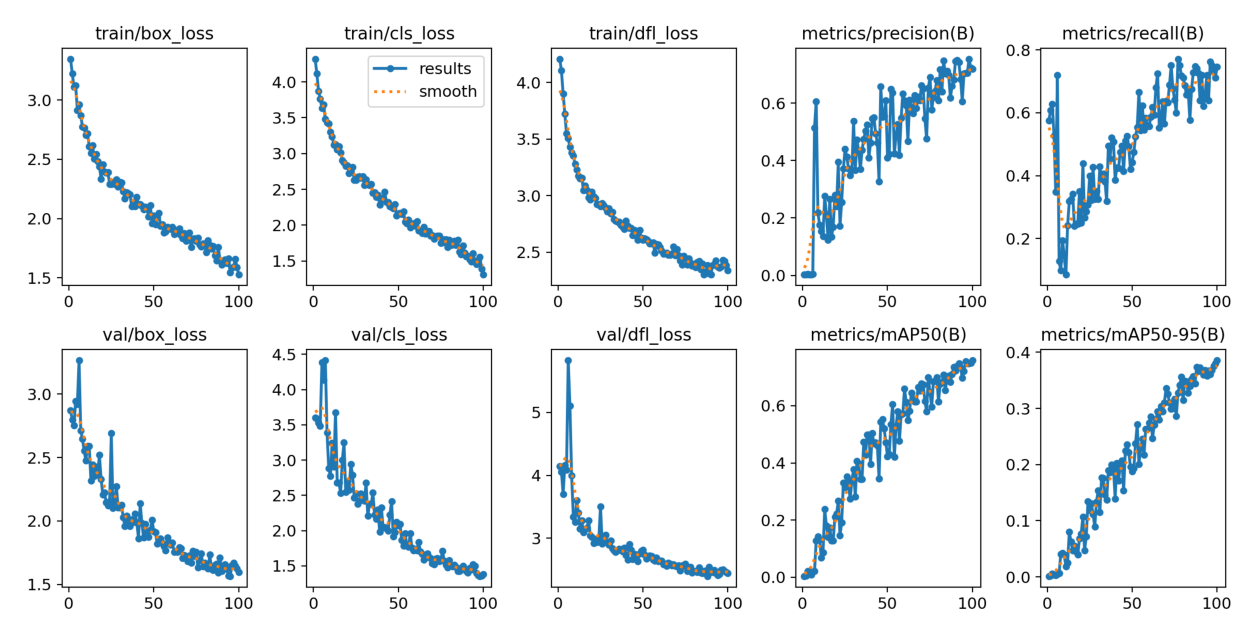

In [29]:
resultados_graficos = cv2.imread(os.path.join(dir_resultados, 'results.png'))
mostrar(resultados_graficos)

In [30]:
resultados_graficos

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [31]:
dir_resultados_val = '/content/runs/detect/yolov8s_modelo_eval'

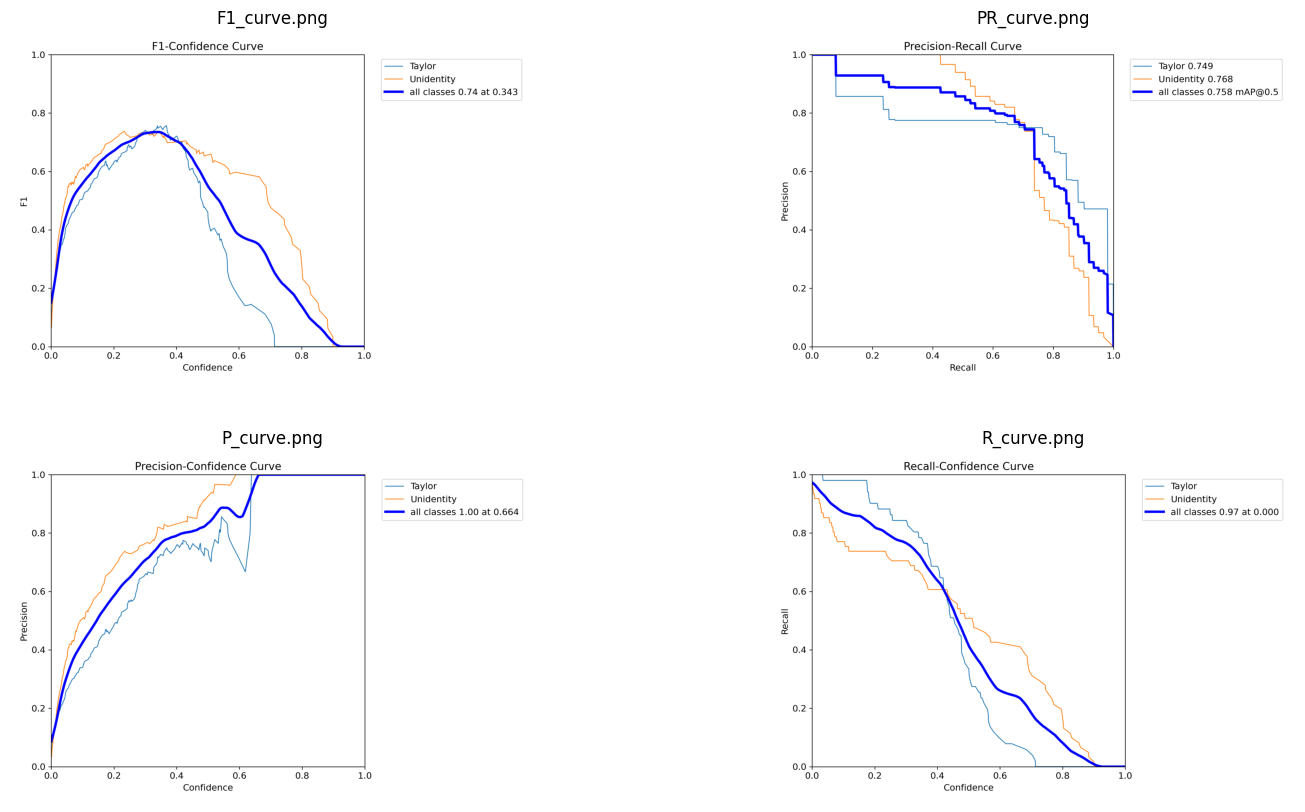

In [32]:
imgs = ['F1_curve.png', 'PR_curve.png', 'P_curve.png', 'R_curve.png']
plt.figure(figsize=(18, 10))
for i, img in enumerate(imgs):
    #print(i, img)
    grafico = cv2.imread(os.path.join(dir_resultados_val, img))
    #print(grafico)
    grafico = cv2.cvtColor(grafico, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 2, i+1)
    plt.title(imgs[i])
    plt.imshow(grafico)
    plt.axis('off')
plt.show()

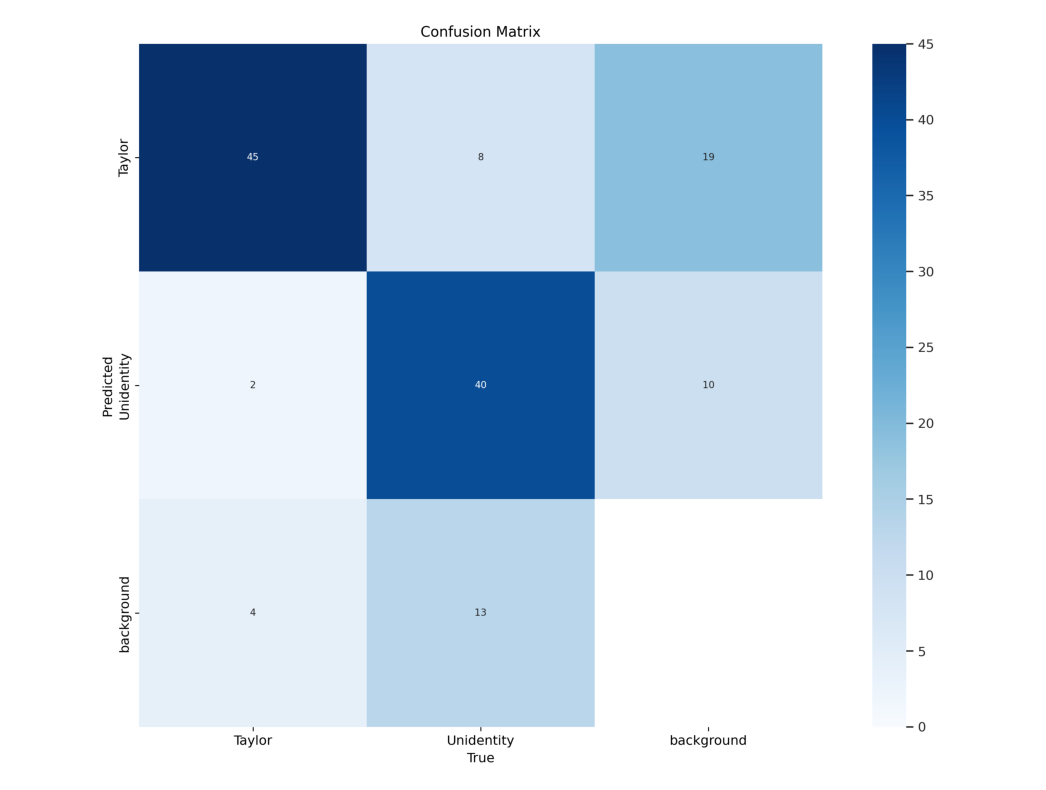

In [33]:
matriz_confusao = cv2.imread(os.path.join(dir_resultados_val, 'confusion_matrix.png'))
mostrar(matriz_confusao)

In [34]:
!mkdir imagens_teste

In [42]:
!yolo task=detect mode=predict model={dir_resultados}/weights/best.pt source='/content/imagens_teste' save=True conf=0.25

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 186 layers, 9,828,438 parameters, 0 gradients, 23.3 GFLOPs

image 1/5 /content/imagens_teste/1-2cac1287_jpg.rf.f8e7d47f61ff2350f00b5ed699f2c2f2.jpg: 640x640 (no detections), 15.1ms
image 2/5 /content/imagens_teste/IMG_20210814_111355_854.webp: 640x384 (no detections), 51.5ms
image 3/5 /content/imagens_teste/images_jpeg.rf.3c1c9cdff50e2d97f69a13db09dd2bed.jpg: 640x640 (no detections), 16.3ms
image 4/5 /content/imagens_teste/kendall_img_teste.jpg: 640x448 (no detections), 59.5ms
image 5/5 /content/imagens_teste/taylor_img_teste.jpg: 384x640 (no detections), 56.9ms
Speed: 2.6ms preprocess, 39.9ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


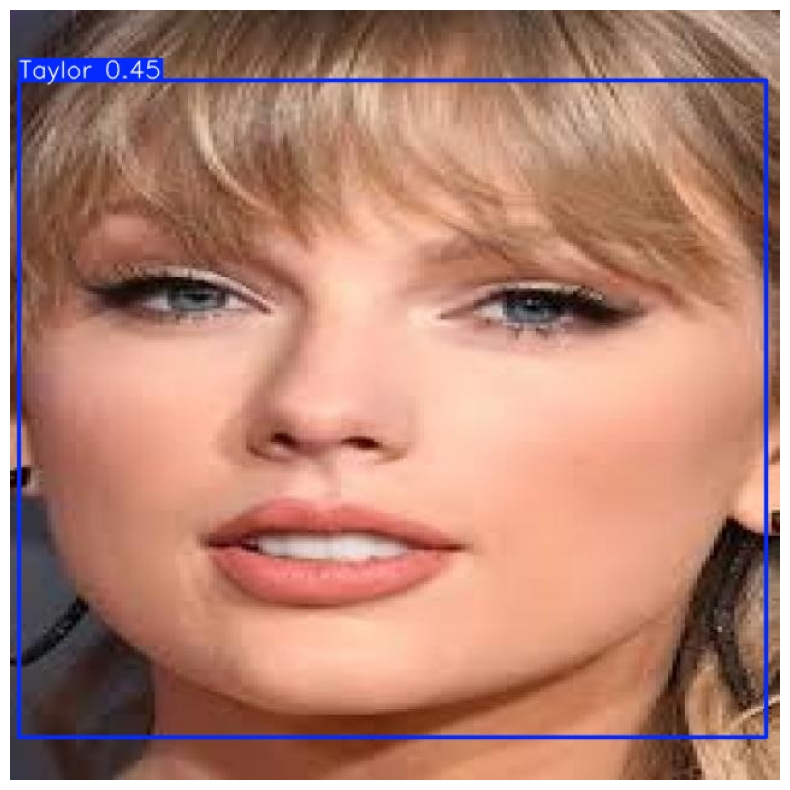

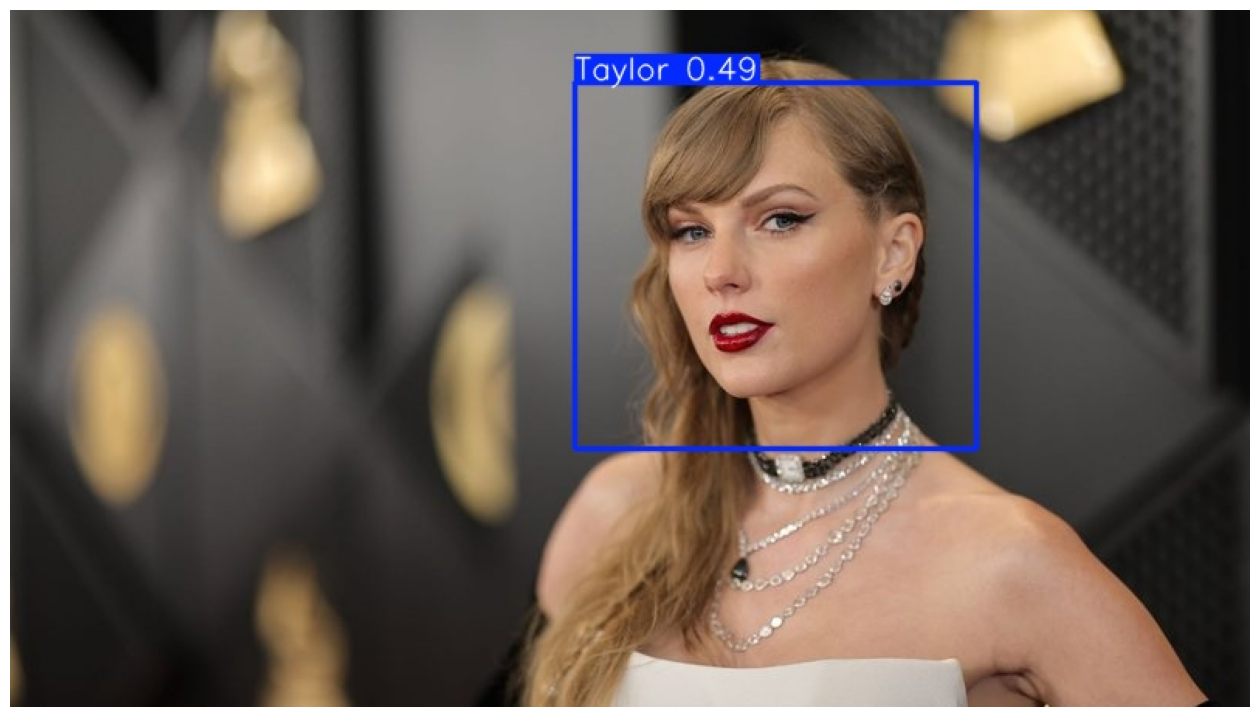

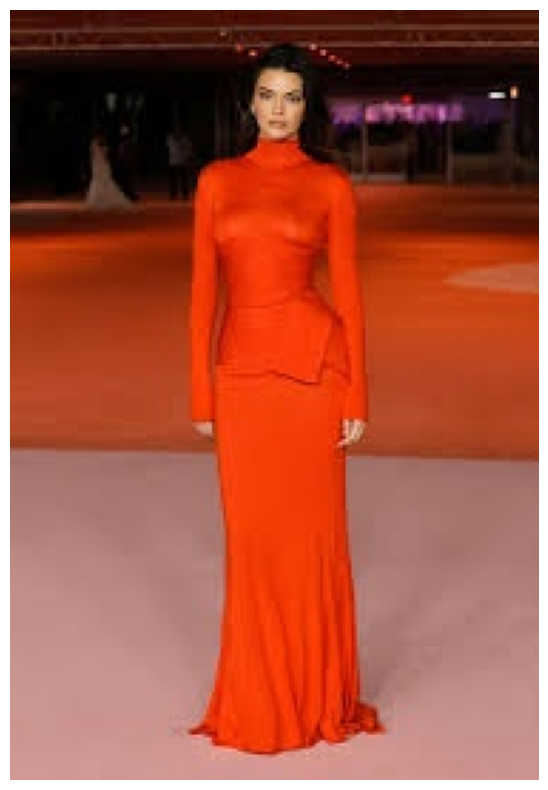

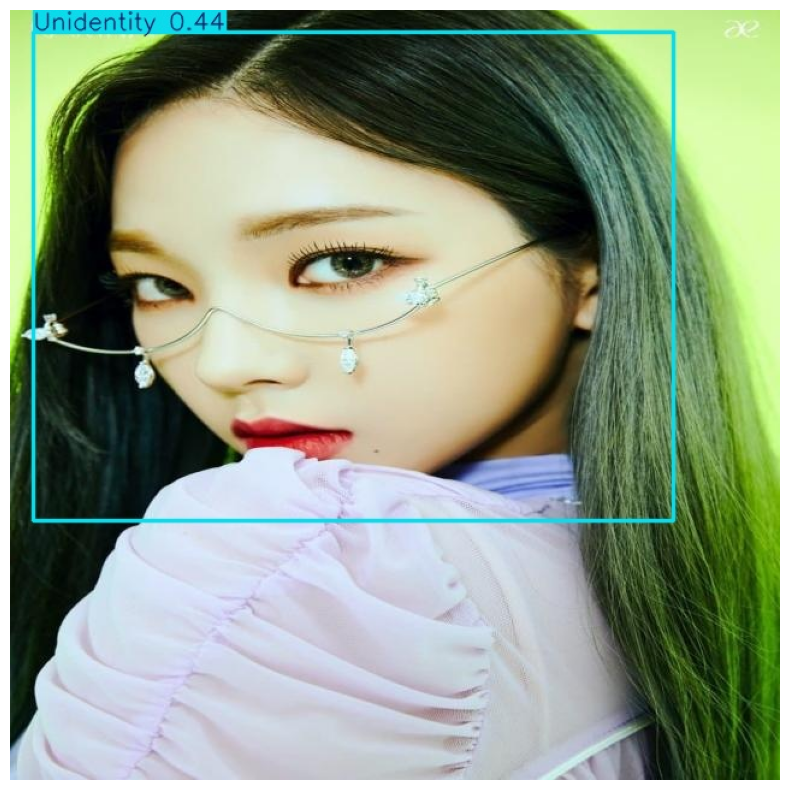

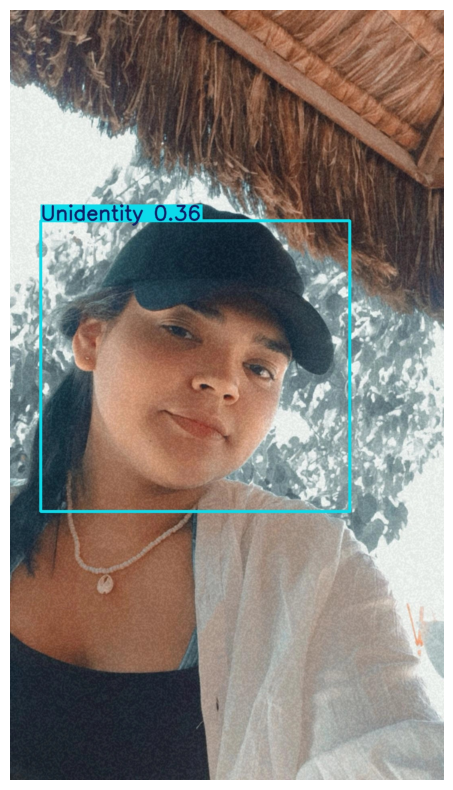

In [44]:
dir_predicoes = '/content/runs/detect/predict3'
caminhos = [os.path.join(dir_predicoes, f) for f in os.listdir(dir_predicoes)]
#print(caminhos)
for caminho_imagem in caminhos:
    imagem = cv2.imread(caminho_imagem)
    mostrar(imagem)

#Continuando Treinamento


In [45]:
!yolo task=detect mode=train model={dir_resultados}/weights/last.pt data={arquivo_config} epochs=100

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/yolov8s_modelo4/weights/last.pt, data=/content/configs_modelo.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

In [46]:
!yolo task=detect mode=val model={dir_resultados}/weights/best.pt name=yolov8s_modelo_eval data=configs_modelo.yaml

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 186 layers, 9,828,438 parameters, 0 gradients, 23.3 GFLOPs
val: Scanning /content/dataset/val/labels.cache... 78 images, 6 backgrounds, 0 corrupt: 100% 78/78 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:02<00:00,  1.76it/s]
                   all         78        112      0.719      0.747      0.758      0.385
                Taylor         48         51      0.662      0.805      0.749      0.348
            Unidentity         28         61      0.776      0.689      0.768      0.423
Speed: 3.5ms preprocess, 12.1ms inference, 0.0ms loss, 9.4ms postprocess per image
Results saved to runs/detect/yolov8s_modelo_eval2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [50]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source='/content/imagens_teste' save=True conf=0.5

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 186 layers, 9,828,438 parameters, 0 gradients, 23.3 GFLOPs

image 1/5 /content/imagens_teste/1-2cac1287_jpg.rf.f8e7d47f61ff2350f00b5ed699f2c2f2.jpg: 640x640 1 Unidentity, 15.2ms
image 2/5 /content/imagens_teste/IMG_20210814_111355_854.webp: 640x384 (no detections), 65.3ms
image 3/5 /content/imagens_teste/images_jpeg.rf.3c1c9cdff50e2d97f69a13db09dd2bed.jpg: 640x640 1 Taylor, 16.4ms
image 4/5 /content/imagens_teste/kendall_img_teste.jpg: 640x448 (no detections), 63.3ms
image 5/5 /content/imagens_teste/taylor_img_teste.jpg: 384x640 1 Taylor, 66.2ms
Speed: 4.3ms preprocess, 45.3ms inference, 199.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


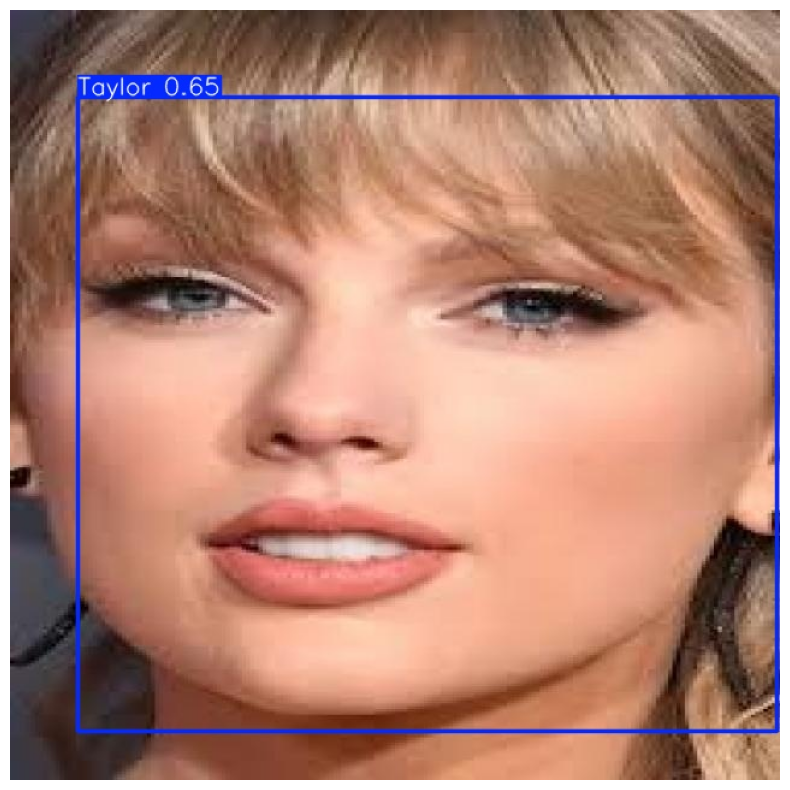

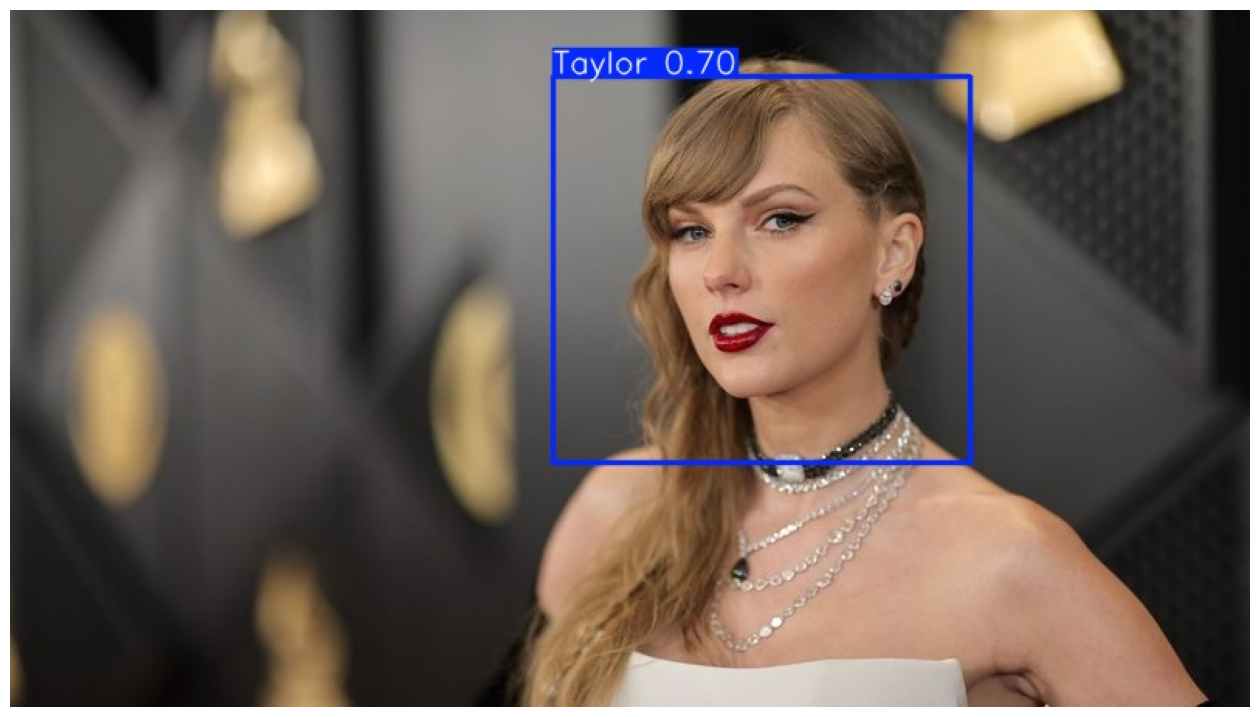

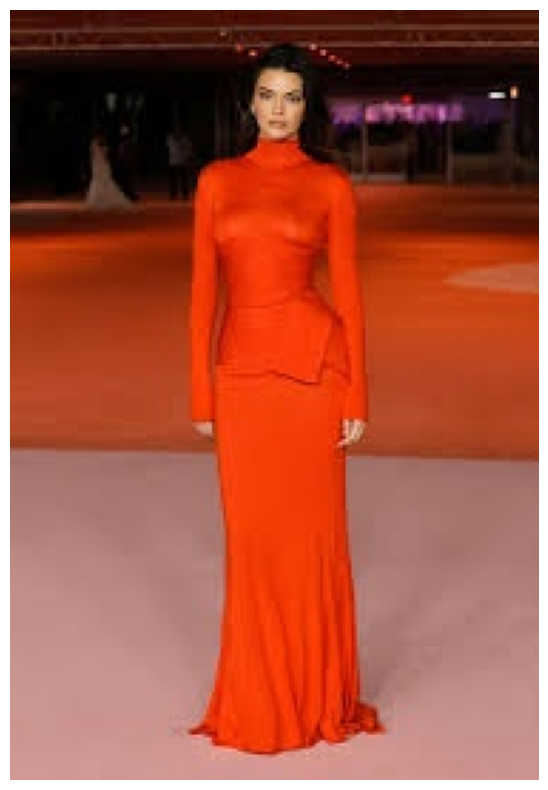

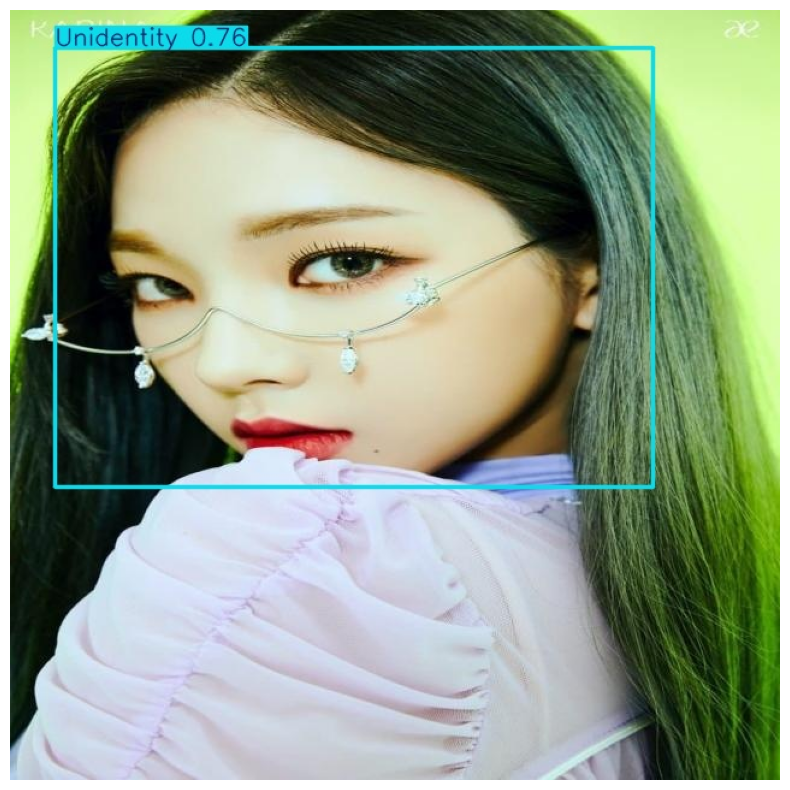

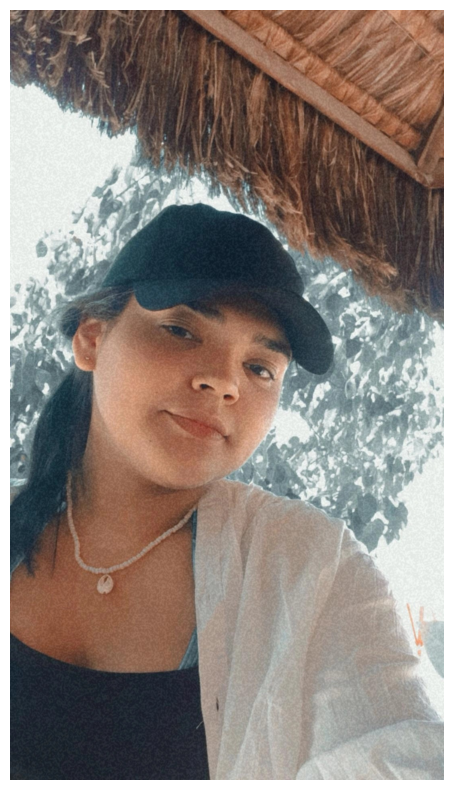

In [51]:
dir_predicoes = '/content/runs/detect/predict6'
caminhos = [os.path.join(dir_predicoes, f) for f in os.listdir(dir_predicoes)]
#print(caminhos)
for caminho_imagem in caminhos:
    imagem = cv2.imread(caminho_imagem)
    mostrar(imagem)

#Exportar para outros formatos

In [1]:
os.path.join(dir_resultados, 'weights','best.pt')

NameError: name 'os' is not defined

In [ ]:
model_treinado = YOLO(os.path.join(dir_resultados, 'weights','best.pt'))
model_trainado.export(format = 'onnx')